In [1]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)


from useful import *

global data_dir
data_dir = '/scratch/ap587/dry_data/'

In [2]:
def check_spinup(data):
    '''look at the temperature yearly means to check for equilibrium'''
    pass

In [2]:
exp = '4_HS_hc10.0/'
runs = range(9,35)
runset = open_runset(data_dir, exp,runs)   
runset['p_trop'] = 1000*np.exp(-9.81/(287.04*270)*runset.h_trop*1000)
c = runset.mean('lon')
c.time.data = c.time.data/24 - 1

print(c)

<xarray.Dataset>
Dimensions:  (lat: 64, latb: 65, lonb: 129, pfull: 32, phalf: 33, time: 1440)
Coordinates:
  * phalf    (phalf) float64 0.0 31.25 62.5 93.75 125.0 156.2 187.5 218.8 ...
  * latb     (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 -72.57 ...
  * lonb     (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 18.28 ...
  * pfull    (pfull) float64 11.5 45.98 77.6 109.0 140.3 171.6 202.9 234.2 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * time     (time) float64 720.0 721.0 722.0 723.0 724.0 725.0 726.0 727.0 ...
Data variables:
    ps       (time, lat) float64 9.943e+04 9.941e+04 9.936e+04 9.928e+04 ...
    h_trop   (time, lat) float64 5.621 6.626 7.193 7.601 7.922 8.189 8.417 ...
    temp     (time, pfull, lat) float64 199.5 199.4 199.3 199.3 199.4 199.8 ...
    ucomp    (time, pfull, lat) float64 0.168 1.035 3.007 6.118 10.46 16.03 ...
    vcomp    (time, pfull, lat) float64 -0.007415 -0.0174 -0.02693 -0.03418 ...
   

In [8]:
a = np.zeros((4,5))
print(c.temp.isel(time=-1).mean().values)

236.060424902


In [4]:
c.coords['year'] = c.time//360
c.coords['day'] = c.time%360
#c.temp.groupby('year').mean('time').plot(x='lat',y='pfull',col='year', colwrap=3)
print(c)


<xarray.Dataset>
Dimensions:  (lat: 64, latb: 65, lonb: 129, pfull: 32, phalf: 33, time: 1440)
Coordinates:
  * phalf    (phalf) float64 0.0 31.25 62.5 93.75 125.0 156.2 187.5 218.8 ...
  * latb     (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 -72.57 ...
  * lonb     (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 18.28 ...
  * pfull    (pfull) float64 11.5 45.98 77.6 109.0 140.3 171.6 202.9 234.2 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * time     (time) float64 720.0 721.0 722.0 723.0 724.0 725.0 726.0 727.0 ...
    year     (time) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    day      (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
Data variables:
    ps       (time, lat) float64 9.943e+04 9.941e+04 9.936e+04 9.928e+04 ...
    h_trop   (time, lat) float64 5.621 6.626 7.193 7.601 7.922 8.189 8.417 ...
    temp     (time, pfull, lat) float64 199.5 199.4 199.3 199.3 199.4 199.8 ...
    uc

In [7]:
print(c.year)
d = c.groupby('year')
d = d.mean('time').isel(pfull=-1)
fig, ax = plt.subplots()
for yearly_t in d:
    yearly_t.plot(ax=ax, label='year %d' % yearly_t.year.values)
plt.legend()

<xarray.DataArray 'year' (time: 1440)>
array([ 2.,  2.,  2., ...,  5.,  5.,  5.])
Coordinates:
  * time     (time) float64 720.0 721.0 722.0 723.0 724.0 725.0 726.0 727.0 ...
    year     (time) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    day      (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...


ValueError: buffer source array is read-only

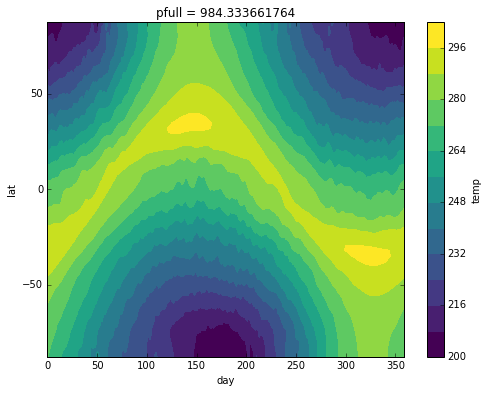

In [6]:
dayg = c.temp.groupby('day').mean('time').isel(pfull=-1)
fig, ax = plt.subplots()
dayg.plot.contourf(x='day',y='lat', levels=15)